# MODELS BUILDING, TRAINING AND TESTING - NOUAR Alexandre & DURA Théo

## Imports and data :

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import pickle
import matplotlib.pyplot

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import mlflow
import mlflow.xgboost

Import datasets

In [2]:
df_train = pd.read_csv('../data/processed/train_data.csv')
df_test = pd.read_csv('../data/processed/test_data.csv')

Splitting features and target

In [3]:
X = df_train.drop(columns = ['TARGET'])
Y = df_train['TARGET']

x_to_test = df_test

Split data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(117777, 216) (39259, 216) (117777,) (39259,)


## XGBOOST :

In [6]:
from xgboost import XGBClassifier

Define the XGB model and fit it.

In [7]:
XGB = XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False, eta=0.3, subsample=1
                           , colsample_bytree=1)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, eval_metric='logloss', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

Try a prediction on the testing set to compute results

In [8]:
y_pred_xgb = XGB.predict(X_test)

print(XGB.score(X_test,y_test))

0.9285768868284979


Print the confusion matrix :

In [9]:
from sklearn.metrics import confusion_matrix

cmXGB = confusion_matrix(y_test,y_pred_xgb)

<AxesSubplot:>

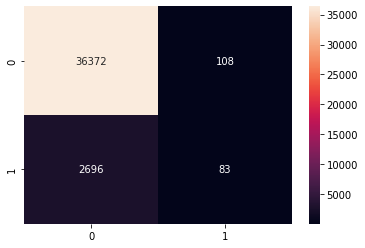

In [10]:
sb.heatmap(cmXGB,annot=True, fmt='g')

In [11]:
print("XGB accuracy : " + str(accuracy_score(y_test, y_pred_xgb)))
print("XGB precision : " + str(precision_score(y_test, y_pred_xgb)))

XGB accuracy : 0.9285768868284979
XGB precision : 0.43455497382198954


We'll now try to predict values using the test dataset.

In [12]:
y_predict_XGB = XGB.predict(x_to_test)

pd.DataFrame(y_predict_XGB, columns=['Predicted value']).head()

,Predicted value
0,0
1,0
2,0
3,0
4,0


## RANDOM FOREST :

In [13]:
from sklearn.ensemble import RandomForestClassifier

Define the random forest classifier and train it

In [14]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

Predict the results of the testing set and compare it to the real values.

In [15]:
y_pred_rfc = RFC.predict(X_test)

print(RFC.score(X_test,y_test))

0.9292391553529127


<AxesSubplot:>

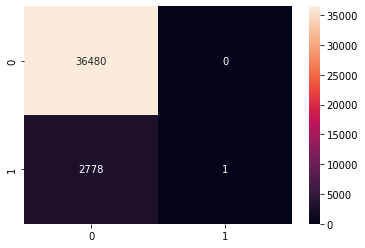

In [16]:
from sklearn.metrics import confusion_matrix

cmRFC = confusion_matrix(y_test,y_pred_rfc)

sb.heatmap(cmRFC,annot=True, fmt ='g')

In [17]:
print("RFC accuracy : " + str(accuracy_score(y_test, y_pred_rfc)))
print("RFC precision : " + str(precision_score(y_test, y_pred_rfc)))

RFC accuracy : 0.9292391553529127
RFC precision : 1.0


We'll now try to predict values using the test dataset.

In [18]:
y_predict_RFC = RFC.predict(x_to_test)

pd.DataFrame(y_predict_RFC, columns=['Predicted value']).head()

,Predicted value
0,0
1,0
2,0
3,0
4,0


## GRADIENT BOOSTING :

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

Define the Gradient boosting classifier and train it

In [20]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

Predict the values and compare it to real values

In [21]:
y_pred_GBC = GBC.predict(X_test)

print(GBC.score(X_test,y_test))

0.92929009908556


<AxesSubplot:>

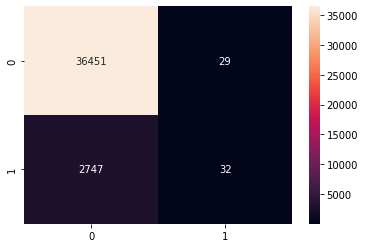

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

cmGBC = confusion_matrix(y_test,y_pred_GBC)

sb.heatmap(cmGBC,annot=True, fmt='g')

In [23]:
print("GBC accuracy : " + str(accuracy_score(y_test, y_pred_GBC)))
print("GBC precision : " + str(precision_score(y_test, y_pred_GBC)))

GBC accuracy : 0.92929009908556
GBC precision : 0.5245901639344263


We'll now try to predict values using the test dataset.

In [24]:
y_predict_GBC = GBC.predict(x_to_test)

pd.DataFrame(y_predict_GBC, columns=['Predicted value']).head()

,Predicted value
0,0
1,0
2,0
3,0
4,0
